In [174]:
import warnings
import numpy as np
import pandas as pd 
import geopandas as gpd

import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

from tesspy import Tessellation
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable
from shapely.geometry import Point, Polygon

# Dfs

In [175]:
df_lat_lon = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\df_lat_lon.csv', sep = ';')

<>:1: SyntaxWarning:

invalid escape sequence '\A'

<>:1: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15364\2773533858.py:1: SyntaxWarning:

invalid escape sequence '\A'



In [176]:
df_zona = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\df_zona_cnae.csv', sep = ';', index_col=False)
df_zona.set_index('Unnamed: 0', inplace=True)

<>:1: SyntaxWarning:

invalid escape sequence '\A'

<>:1: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15364\3871110104.py:1: SyntaxWarning:

invalid escape sequence '\A'



In [177]:
df_nomes_fantazia = df_lat_lon[['CNAE FISCAL PRINCIPAL', 'TIPO']]
df_nomes_fantazia['CNAE FISCAL PRINCIPAL'] = df_nomes_fantazia['CNAE FISCAL PRINCIPAL'].astype(str).tolist()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15364\2779688943.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Fortaleza

In [178]:
Fortaleza = Tessellation("Fortaleza")
Fortaleza_polygon = Fortaleza.get_polygon()

Text(0.5, 1.0, 'Fortaleza')

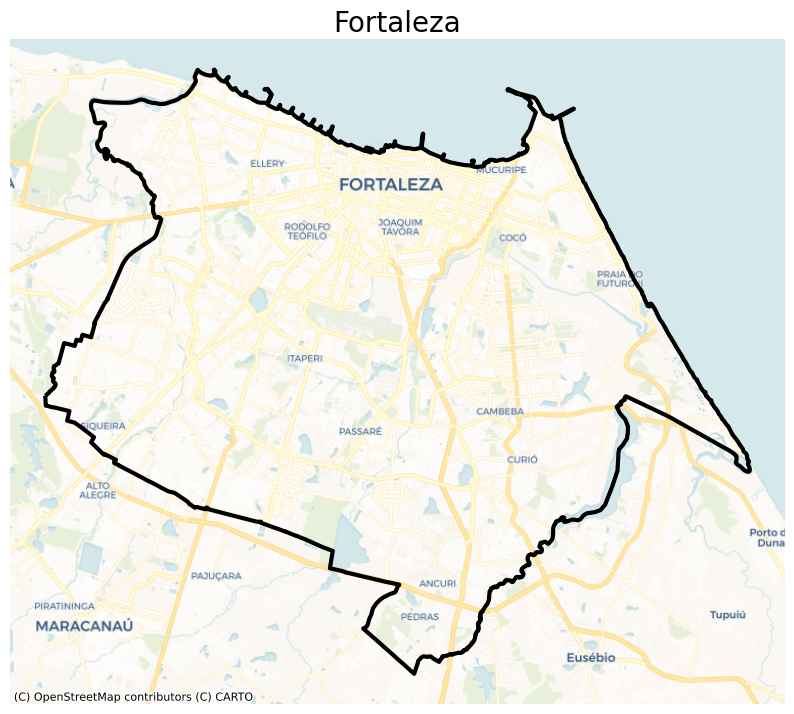

In [179]:
fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

In [180]:
cnae = len(df_lat_lon['CNAE FISCAL PRINCIPAL'].drop_duplicates())
print(f"No denreco selecionado contem **{cnae}** CNAIS(s) distintos")
cnpj = len(df_lat_lon['CNPJ BÁSICO'].drop_duplicates())
print("No denreco selecionado contem {} CNPJ(s) Básicos distintos".format(cnpj))

No denreco selecionado contem **64** CNAIS(s) distintos
No denreco selecionado contem 14496 CNPJ(s) Básicos distintos


In [181]:
df_totais_fortaleza = pd.DataFrame(df_zona.iloc[-1].astype(str).sort_values(ascending=False))

In [182]:
df_totais_fortaleza['CNAE FISCAL PRINCIPAL'] = list(df_totais_fortaleza.index)

In [184]:
len(df_totais_fortaleza)

64

In [185]:
df_totais = pd.merge(df_totais_fortaleza, df_nomes_fantazia, how = 'right', on = 'CNAE FISCAL PRINCIPAL').drop_duplicates()

In [194]:
df_totais.sort_values( ascending=False, by='Total', inplace = True)

In [195]:
lista_nomes = list(df_totais['TIPO'])
lista_quantidades = list(df_totais['Total'])

In [197]:
fig = px.bar(x=lista_nomes, y=lista_quantidades)
fig.update_xaxes(tickangle=90, showticklabels=False)  # Remove os rótulos do eixo x
fig.update_layout(
    title='Gráfico de Barras dos CNAIs Mais Utilizados em Fortaleza',
    xaxis_title='Lista de CNAIs',
    yaxis_title='Quantidades'
)
fig.show()

# Outras Localidades 

In [209]:
df_zona2 = df_zona.drop(df_zona.index[-1])

In [210]:
media=df_zona2.mean().values
std=df_zona2.std()

In [218]:
df_fortaleza_hexagons = gpd.read_file(r'D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.shp')

In [232]:
df_fortaleza_hexagons

,hex_id,Zonas,geometry
0,8880104e0bfffff,Zona_1,"POLYGON ((-38.52511 -3.81331, -38.53005 -3.811..."
1,88801040b7fffff,Zona_2,"POLYGON ((-38.53442 -3.83896, -38.53936 -3.837..."
2,8880104e09fffff,Zona_3,"POLYGON ((-38.51925 -3.82027, -38.52419 -3.818..."
3,88801045cdfffff,Zona_4,"POLYGON ((-38.61437 -3.80507, -38.61932 -3.803..."
4,8880104f31fffff,Zona_5,"POLYGON ((-38.45309 -3.77658, -38.45803 -3.774..."
...,...,...,...
351,8880104515fffff,Zona_352,"POLYGON ((-38.59059 -3.80887, -38.59553 -3.807..."
352,8880104ea9fffff,Zona_353,"POLYGON ((-38.53923 -3.75980, -38.54417 -3.758..."
353,8880107b4dfffff,Zona_354,"POLYGON ((-38.59265 -3.74523, -38.59759 -3.743..."
354,8880104ee7fffff,Zona_355,"POLYGON ((-38.53338 -3.76676, -38.53831 -3.764..."


O emderco esta contido na Zona Zona_263
No denreco selecionado contem 32 CNAIS(s) distintos
No denreco selecionado contem 55 CNPJ(s) Básicos distintos


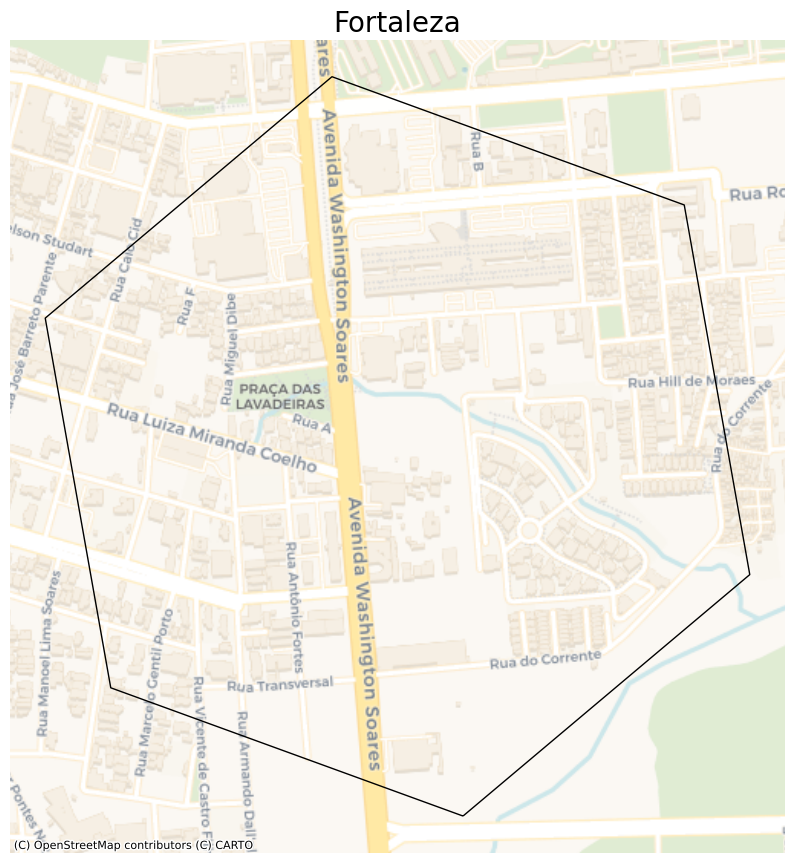

In [233]:
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode('Rua Adail teixeira 110')
if location:
    latitude = location.latitude
    longitude = location.longitude
    ponto = Point(longitude, latitude)
    for index, row in df_fortaleza_hexagons[['geometry','Zonas']].iterrows():
        if row['geometry'].contains(ponto):
            print(f'O emderco esta contido na Zona {row['Zonas']}')
            zona_encontrada = row['geometry']
            nome_zona = row['Zonas']
            break
            
    df_filtrado_zona = df_lat_lon[df_lat_lon['Zonas'] == nome_zona]
    cnae = len(df_filtrado_zona['CNAE FISCAL PRINCIPAL'].drop_duplicates())
    print(f"No denreco selecionado contem {cnae} CNAIS(s) distintos")
    cnpj = len(df_filtrado_zona['CNPJ BÁSICO'].drop_duplicates())
    print("No denreco selecionado contem {} CNPJ(s) Básicos distintos".format(cnpj))

    fig, ax = plt.subplots(figsize=(10,15))
    df_fortaleza_hexagons[df_fortaleza_hexagons['geometry'] == row['geometry']]['geometry'].to_crs("EPSG:3857").plot(ax=ax, facecolor='none', edgecolor="k", lw=1)
    # df_fortaleza_hexagons['geometry'].to_crs("EPSG:3857")
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title("Fortaleza", fontsize=20)
    plt.show()

    x = df_zona[df_zona.index == row['Zonas']]
    resultado=(x-media)/std
    daux = pd.DataFrame(resultado).T
    daux = daux.rename(columns={daux.columns[0]: 'Z'}).sort_values('Z')
    daux['CNAE FISCAL PRINCIPAL'] = list(daux.index)
    daux = pd.merge(daux, df_nomes_fantazia, how = 'right', on = 'CNAE FISCAL PRINCIPAL').drop_duplicates()
    lista_nomes = list(daux['TIPO'])
    lista_valores = list(daux['Z'])
    fig = px.bar(x=lista_nomes, y=lista_quantidades)
    fig.update_xaxes(tickangle=90, showticklabels=False)  # Remove os rótulos do eixo x
    fig.update_layout(
        title=f'Gráfico de Barras dos CNAIs Mais Utilizados em Fortaleza',
        xaxis_title='Lista de CNAIs',
        yaxis_title='Quantidades'
    )
    fig.show()
    
else:
    print('Endereço não encontrad')